In [ ]:
%pip install qbraid --quiet
%pip install qbraid-qir --quiet
%pip install cirq-core --quiet
%pip install amazon-braket-sdk --quiet
%pip install matplotlib --quiet

In [1]:
from braket.circuits import Circuit
from qbraid import SUPPORTED_QPROGRAMS
from qbraid.transpiler import Conversion, ConversionGraph, convert_to_package

from qbraid_qir import dumps
from qbraid_qir.cirq import cirq_to_qir

In [2]:
SUPPORTED_QPROGRAMS

{'cirq': 'cirq.circuits.circuit.Circuit',
 'braket': 'braket.circuits.circuit.Circuit',
 'openqasm3': 'openqasm3.ast.Program',
 'qasm2': 'str',
 'qasm3': 'str'}

Default qBraid-SDK conversion graph with Amazon Braket and Cirq nodes

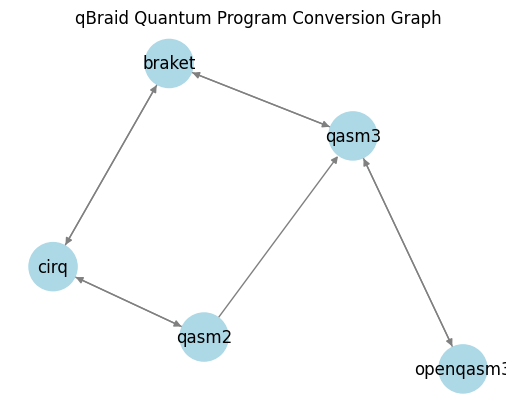

In [3]:
graph = ConversionGraph()

graph.plot()

Add Cirq $\rightarrow$ QIR to qBraid-SDK conversion graph

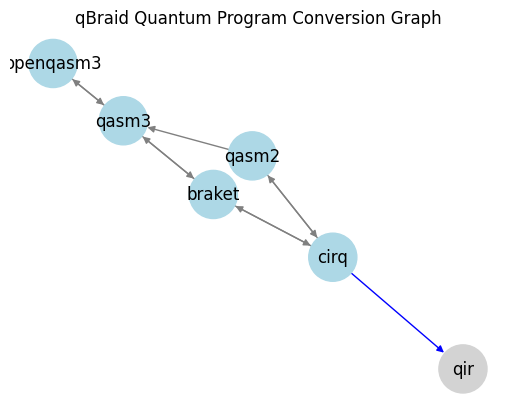

In [4]:
conversion = Conversion("cirq", "qir", cirq_to_qir)

graph.add_conversion(conversion)

graph.plot()

Create Amazon Braket circuit

In [5]:
braket_circuit = Circuit().h(0).cnot(0, 1)

print(braket_circuit)

T  : |0|1|
          
q0 : -H-C-
        | 
q1 : ---X-

T  : |0|1|


Convert Amazon Braket circuit to QIR

In [6]:
qir_module = convert_to_package(braket_circuit, "qir", conversion_graph=graph)

ir = str(qir_module)

print(ir)

; ModuleID = 'circuit-c73622e'
source_filename = "circuit-c73622e"

%Qubit = type opaque
%Result = type opaque

define void @main() #0 {
entry:
  call void @__quantum__rt__initialize(i8* null)
  call void @__quantum__qis__h__body(%Qubit* null)
  call void @__quantum__qis__cnot__body(%Qubit* null, %Qubit* inttoptr (i64 1 to %Qubit*))
  call void @__quantum__rt__result_record_output(%Result* null, i8* null)
  call void @__quantum__rt__result_record_output(%Result* inttoptr (i64 1 to %Result*), i8* null)
  ret void
}

declare void @__quantum__rt__initialize(i8*)

declare void @__quantum__qis__h__body(%Qubit*)

declare void @__quantum__qis__cnot__body(%Qubit*, %Qubit*)

declare void @__quantum__rt__result_record_output(%Result*, i8*)

attributes #0 = { "entry_point" "output_labeling_schema" "qir_profiles"="custom" "required_num_qubits"="2" "required_num_results"="2" }

!llvm.module.flags = !{!0, !1, !2, !3}

!0 = !{i32 1, !"qir_major_version", i32 1}
!1 = !{i32 7, !"qir_minor_version", i32

Save QIR output to `.ll` and `.bc` files in current working directory

In [7]:
dumps(qir_module)